In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn
import scipy
%matplotlib inline

In [2]:
from sklearn import preprocessing

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [3]:
data = pd.read_csv("train.csv")
w_test_data = pd.read_csv("test 2 (1).csv")
sample_submission = pd.read_csv("sample_submission (1).csv")

## Data Cleaning and Feature Engineering

In [4]:
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    
    data = data.replace("Monday", 1)
    data = data.replace("Tuesday", 2)
    data = data.replace("Wednesday", 3)
    data = data.replace("Thursday", 4)
    data = data.replace("Friday", 5)
    data = data.replace("Saturday", 6)
    data = data.replace("Sunday", 7)
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HEALTH AND BEAUTY AIDS': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    features = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']
    return data

In [5]:
data = transform_my_data(data)

In [6]:
def transform_w_data(data):
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data = data.replace("Friday", 5)
    data = data.replace("Monday", 1)
    data = data.replace("Tuesday", 2)
    data = data.replace("Wednesday", 3)
    data = data.replace("Thursday", 4)
    data = data.replace("Saturday", 6)
    data = data.replace("Sunday", 7)
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)
    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, 'NumItems': np.sum, 'Return': np.max, 
                'ACCESSORIES': np.sum,
           'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
           'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
           'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
           'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
           'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
           'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
           'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HOME DECOR': np.sum,
           'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
           'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
           'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
           'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
           'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
           'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
           'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
           'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
           'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
           'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
           'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
           'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
           'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["Weekday", "NumItems", "Return", 'ACCESSORIES',
               'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
               'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
               'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
               'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
               'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
               'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
               'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
               'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
               'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
               'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
               'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
               'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
               'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
               'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
               'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
               'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
               'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
               'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
               'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
               'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    return data

In [7]:
test_features = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']
features = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']

In [8]:
test = transform_w_data(w_test_data)

## Local Modeling

### Logistic Regression

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
mytrain, mytest = train_test_split(data, test_size = .4)
mytrain.TripType = mytrain.TripType.astype(float)
mytrain.Weekday = mytrain.Weekday.astype(float)  
mytrain.NumItems = mytrain.NumItems.astype(float)                         
mytest.TripType = mytest.TripType.astype(float)
mytest.Weekday = mytest.Weekday.astype(float)  
mytest.NumItems = mytest.NumItems.astype(float) 

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/pandas/core/generic.py:2273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
def model_testdata(data):
    lr = LogisticRegression()
    lr.fit(X = np.asarray(data[test_features]), y = np.asarray(mytrain.TripType))


In [12]:
lr = LogisticRegression()
lr.fit(X = np.asarray(mytrain[features]), y = np.asarray(mytrain.TripType))

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [19]:
predictions = lr.predict_proba(np.asarray(mytest[features]))

In [71]:
from sklearn.metrics import log_loss

In [21]:
log_loss(mytest.TripType, predictions).round(5)

1.35321

In [22]:
#pd.DataFrame(predictions).head()

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
forest = RandomForestClassifier(n_estimators = 400, max_features=2)

In [144]:
forest = forest.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5

In [141]:
predictions = forest.predict_proba(np.asarray(mytest[features]))

In [28]:
log_loss(mytest.TripType, predictions).round(5)

1.36361

### Extra Trees 

In [97]:
from sklearn.ensemble import ExtraTreesClassifier

In [126]:
extratrees = ExtraTreesClassifier(n_estimators = 100, max_features=3)

In [127]:
extratrees = extratrees.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5

In [128]:
predictions = extratrees.predict_proba(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

2.2265100000000002

In [119]:
extratrees.classes_

array([   3.,    4.,    5.,    6.,    7.,    8.,    9.,   12.,   14.,
         15.,   18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,
         26.,   27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,
         35.,   36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,
         44.,  999.])

### Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. 

Can't use multinomial distribution because it needs all positive feature values, and some of mine are negative due to returns'

In [55]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [44]:
gnb = GaussianNB()
gnb = gnb.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [45]:
predictions = gnb.predict_proba(np.asarray(mytest[features]))

In [54]:
log_loss(mytest.TripType, predictions).round(5)

30.041070000000001

That...didn't work

In [56]:
bnb = BernoulliNB()
bnb = bnb.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [57]:
predictions = bnb.predict_proba(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

1.3789899999999999

Oh wow, that actually did work well. Hey now Bernoulli Naive Bayes.

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

### Nearest Neighbor

In [24]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

In [25]:
knc = KNeighborsClassifier()

In [26]:
knc = knc.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [75]:
predictions = knc.predict_proba(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

6.26328

In [76]:
knc = KNeighborsClassifier(algorithm='ball_tree')

In [77]:
knc = knc.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))
predictions = knc.predict_proba(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

6.3121700000000001

In [29]:
### Linear and Quadratic Discriminant Analysis

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ImportError: No module named 'sklearn.discriminant_analysis'

In [67]:
from sklearn.svm import LinearSVC

In [68]:
lsvc = LinearSVC()
lsvc = lsvc.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [74]:
predictions = lsvc.decision_function(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

4.4655800000000001

### XGBoost (eXtreme Gradient Boosting, or Boosted Trees)

In [13]:
import xgboost as xgb

ImportError: No module named 'xgboost'

### Without Return Column

In [85]:
data = transform_my_data(data)

In [90]:
mytrain, mytest = train_test_split(data, test_size = .4)


In [92]:
lr = LogisticRegression()
lr.fit(X = np.asarray(mytrain[features]), y = np.asarray(mytrain.TripType))
predictions = lr.predict_proba(np.asarray(mytest[features]))

In [93]:
log_loss(mytest.TripType, predictions).round(5)

1.4906200000000001

Ok cool, so the return column did help. Maybe I should multiply it's importance!

## Modeling the Test Data and Exporting to CSV

logistic regression

In [65]:
test_predictions = lr.predict_proba(np.asarray(test[test_features]))

In [145]:
def predictions_to_csv(test_predictions):
    test_predictions = pd.DataFrame(test_predictions)
    test_indexes = test.index
    test_predictions = test_predictions.rename(columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"})
    test_predictions.insert(0, 'VisitNumber', test_indexes)
    test_predictions.to_csv("submissions/second_rf.csv", index=False)

random forest, 300 classifiers

In [146]:
test_predictions = forest.predict_proba(np.asarray(test[test_features]))

In [147]:
# remember to change .csv file before entering
predictions_to_csv(test_predictions)

## Analyzing Results

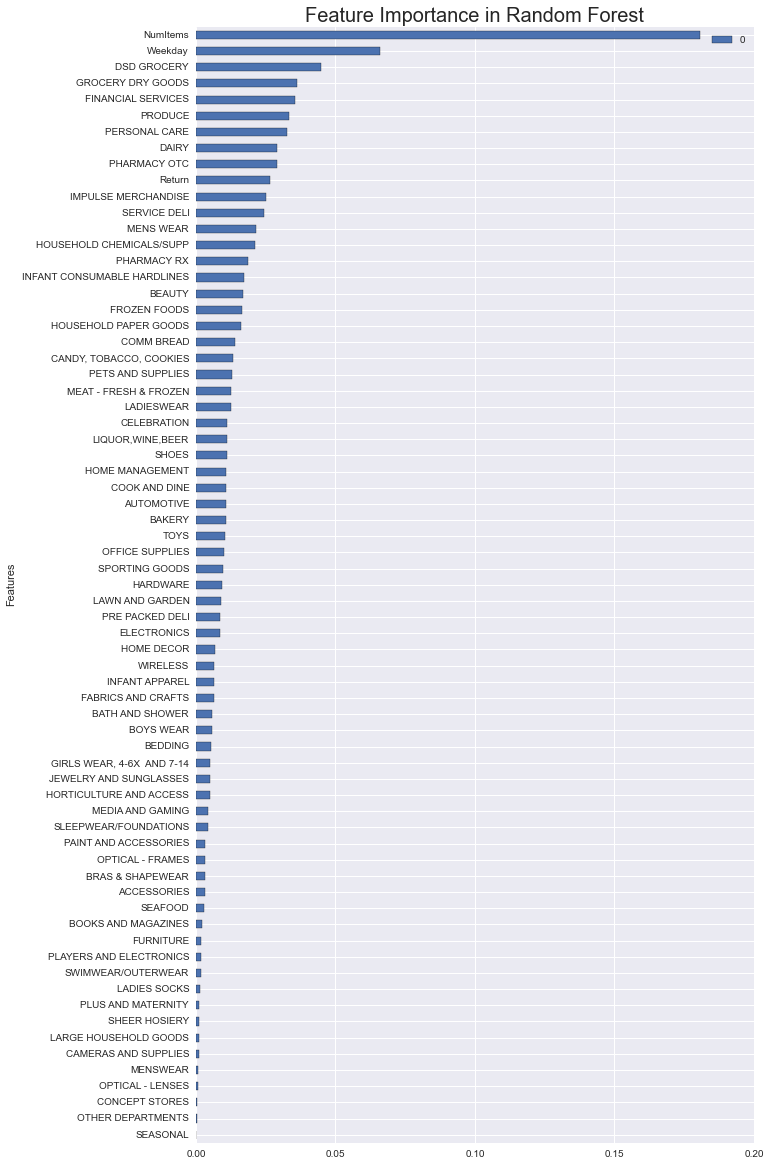

In [528]:
x = forest.feature_importances_
graphing_results = pd.DataFrame(forest.feature_importances_).sort_index()
graphing_results["Features"] = features
graphing_results = graphing_results.set_index("Features").sort_values(by=0, ascending=True)
x = graphing_results.plot(kind="barh", figsize=(10,20), rot=0)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title("Feature Importance in Random Forest", size=20)

In [ ]:
non_departments = x[0:3]
departments = x[4:]

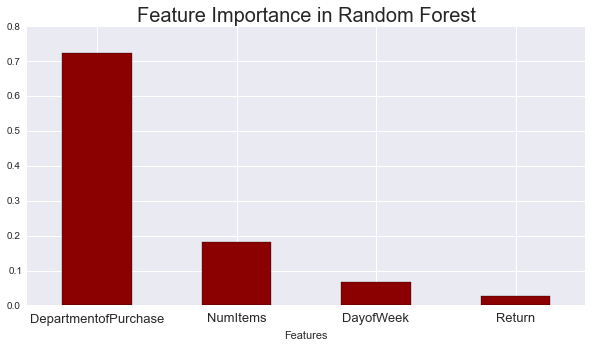

In [532]:
departments = np.sum(departments)
department_data = np.append(non_departments, departments)

graphing_department = pd.DataFrame(department_data).sort_index()
graphing_department["Features"] = ["DayofWeek", "NumItems", "Return", "DepartmentofPurchase"]
graphing_department = graphing_department.set_index("Features").sort_values(by=0, ascending=False)

x = graphing_department.plot(kind="bar", figsize=(10,5), rot=0, color="darkred", legend=False)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=10)
plt.title("Feature Importance in Random Forest", size=20)